In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#connecting to the database
con = sqlite3.connect("accident_data_v1.0.0_2023.db")
cur = con.cursor()
#excuting a query command to get the name of tables
table_list = [a[0] for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(f'Table names are : {table_list}')

Table names are : ['accident', 'casualty', 'vehicle', 'lsoa']


In [3]:
#Methode to get the list of columns in SQL tables
def getTableColumnsNames(table):
    col_info = cur.execute(f"PRAGMA table_info({table})")
    rows = col_info.fetchall()
    
    # Extracting only the values of the first column using list comprehension
    table_column_values = [row[1] for row in rows]
    # Now, column_values contains only the values of the specified column
    print(f"The name of columns in {table} are:")
    print(table_column_values)

In [4]:
getTableColumnsNames('accident')

The name of columns in accident are:
['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']


In [5]:
getTableColumnsNames('casualty')

The name of columns in casualty are:
['casualty_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']


In [6]:
getTableColumnsNames('vehicle')

The name of columns in vehicle are:
['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'generic_make_model', 'driver_imd_decile', 'driver_home_area_type']


In [7]:
getTableColumnsNames('lsoa')

The name of columns in lsoa are:
['objectid', 'lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'shape__area', 'shape__length', 'globalid']


In [8]:
#creating a pandas dataframe from a SQL table
def createDataframe(table, condition, value):
    # Build the SQL query 
    query = f"""
    SELECT
      * 
    FROM {table} 
    WHERE {condition} = {value}
    """
    
    # Execute the query and fetch results as pandas dataframe
    df = pd.read_sql_query(query, con)
    
    # Print the dataframe
    return df

In [9]:
accident_df =createDataframe('accident', 'accident_year', 2020)
display(accident_df)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [10]:
casualty_df = createDataframe('casualty', 'accident_year', 2020)
display(casualty_df)

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [11]:
vehicle_df = createDataframe('vehicle', 'accident_year', 2020)
display(vehicle_df)

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [12]:
query = f"""
    SELECT
      * 
    FROM {'lsoa'} 
    """
    
# Execute the query and fetch results as pandas dataframe
loca_df = pd.read_sql_query(query, con)
display(loca_df)

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [13]:
def check_data_issues(df):
    # Check for missing values
    missing_values = df.isnull().sum().sum()
    number_negative_values= 0
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Check if any value in the row is '-1' (as int, float, or string)
        if row.isin([-1, -1.0, '-1']).any():
            number_negative_values += 1
    
    return {f'number of NAN values are {missing_values}', f'number of negative values are {number_negative_values}'}
    

In [14]:
check_data_issues(accident_df)

{'number of NAN values are 56', 'number of negative values are 42174'}

In [15]:
check_data_issues(casualty_df)

{'number of NAN values are 0', 'number of negative values are 13065'}

In [16]:
check_data_issues(vehicle_df)

{'number of NAN values are 0', 'number of negative values are 68595'}

In [17]:
accident_df = accident_df.dropna()


In [18]:
df_with_nan = accident_df[accident_df.isnull().any(axis=1)]
display(df_with_nan)
   

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location


In [19]:
print(accident_df['date'][5])

01/01/2020


In [20]:
print(accident_df['local_authority_district'].unique())

[ 10   9   1  17   7   6   5  31  32  19  15  21   3  28  20  12  30  14
  16  23   4   8  22  26   2  25  11  27  13  18  24  29  57  -1  63  64
  62  65  60  61  71  82  85  79  77  74  76  70  75  72  84  83  73  80
  91  95  90  93  92 102 107 110 109 100 114 112 101 106 104 128 130 129
 124 147 150 139 148 146 149 169 161 180 186 185 189 182 187 181 184 204
 203 206 200 202 211 210 215 213 228 232 233 231 240 241 243 245 306 305
 300 309 307 303 302 253 252 255 251 257 256 250 254 258 270 274 286 278
 273 284 285 276 277 291 290 293 294 292 321 320 325 324 328 329 323 327
 322 340 344 343 345 341 346 342 347 354 350 352 351 355 356 353 362 364
 363 367 368 360 366 365 361 380 382 383 381 385 384 386 390 392 395 394
 393 391 405 407 406 400 401 404 402 410 413 412 421 424 420 430 435 432
 434 431 438 433  33 437 436 456 451 450 462 454 452 463 460 455 461 453
 459 458 457 484 480 481 478 477 473 479 483 472 475 470 474 482 471 476
 485 491 499 498 497 495 500 492 502 493 490 505 50

In [21]:
import random

values_to_exclude = [-1, -1.0, '-1']


def replace_values_with_random(df, values_to_exclude):
    df_copy = df.copy()  # Create a copy of the DataFrame

    # Iterate over each column in the DataFrame
    for column in df_copy.columns:
        # Get a list of unique values from the column
        unique_values = df_copy[column].unique()

        # Exclude the specified values
        unique_values = [value for value in unique_values if value not in values_to_exclude]

        # Check if there are unique values to choose from after exclusion
        if len(unique_values) > 0:
            # Replace specified values to exclude with a random selection from the remaining unique values
            mask = df_copy[column].isin(values_to_exclude)
            df_copy.loc[mask, column] = df_copy.loc[mask, column].apply(lambda _: random.choice(unique_values))

    return df_copy



In [22]:
accident_df = replace_values_with_random(accident_df, values_to_exclude)

In [23]:
casualty_df = replace_values_with_random(casualty_df, values_to_exclude)

In [24]:
vehicle_df = replace_values_with_random(vehicle_df, values_to_exclude)

In [25]:
accident_dataset = replace_values_with_random(accident_df, values_to_exclude)

In [26]:
important_factors = ['longitude', 'latitude', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'time', 
                     'first_road_class', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class',
                     'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions',
                     'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area',
                     'did_police_officer_attend_scene_of_accident', 'trunk_road_flag']
accident_dataset['time'] = pd.to_datetime(accident_dataset['time']).dt.hour
accident_dataset = accident_dataset[important_factors]


In [27]:
accident_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   longitude                                    91185 non-null  float64
 1   latitude                                     91185 non-null  float64
 2   accident_severity                            91185 non-null  int64  
 3   number_of_vehicles                           91185 non-null  int64  
 4   number_of_casualties                         91185 non-null  int64  
 5   day_of_week                                  91185 non-null  int64  
 6   time                                         91185 non-null  int64  
 7   first_road_class                             91185 non-null  int64  
 8   road_type                                    91185 non-null  int64  
 9   speed_limit                                  91185 non-null  int64  
 10

<Figure size 1000x600 with 0 Axes>

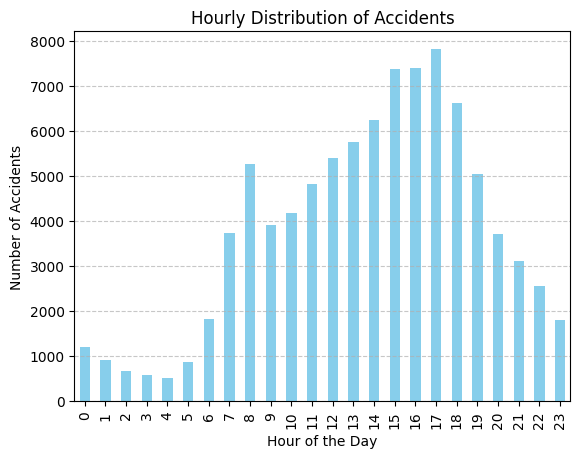

In [28]:
#1. Are there significant hours of the day, and days of the week, on which accidents occur?
#features to be analysed

time_features = ['date', 'day_of_week', 'time', 'accident_severity']

# Create a new DataFrame
time_df = accident_df[time_features].copy()  # Make a copy to avoid SettingWithCopyWarning

# Convert 'time' column to datetime, specifying the format explicitly
time_df['time'] = pd.to_datetime(time_df['time']).dt.hour

# Group the table data based on hours
hourly_accidents = time_df.groupby('time').count()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
hourly_accidents.plot(kind='bar', color='skyblue', legend=False)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Hourly Distribution of Accidents')
plt.xticks(range(hourly_accidents.index.min(), hourly_accidents.index.max() + 1))  # Adjust x-axis ticks for all hours
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

In [29]:
print(time_df['day_of_week'].unique())

[3 2 4 5 6 7 1]


<Figure size 1000x600 with 0 Axes>

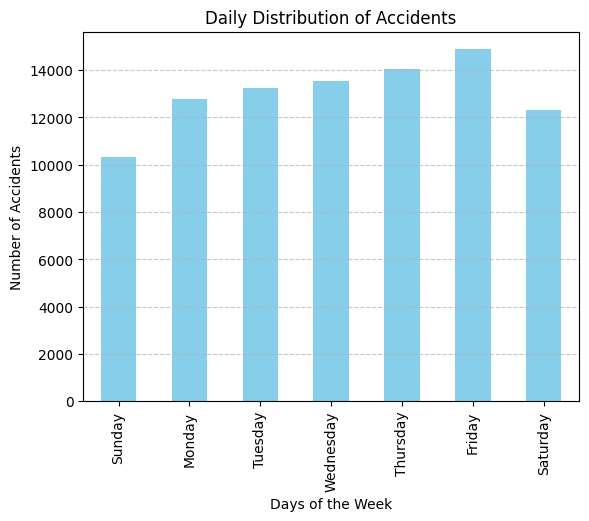

In [30]:
# Grouping the table data based on the day of the week
daily_accident = time_df.groupby('day_of_week').count()

# Create a dictionary to map numeric day values to day names
day_names = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday',
             5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
daily_accident.plot(kind='bar', color='skyblue', legend=False)

# Adjust the x-axis ticks and labels
x_ticks = np.arange(daily_accident.index.min(), daily_accident.index.max() + 1)
x_labels = [day_names[day] for day in x_ticks]
plt.xticks(x_ticks-1, x_labels)

plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.title('Daily Distribution of Accidents')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

plt.show()

In [31]:
# 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?
#We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.
#finding which values represent the 125cc or less, 125 to 500 cc and over 
print(f"unique values of vehicle type column are: {vehicle_df['vehicle_type'].unique()}")

unique values of vehicle type column are: [ 9  8  3  2 11  1 90 19  4  5 21 97 20 98 10 17 23 22 18 16]


In [32]:
#building the dataframe for MCs based on the engine categories
query_mc = f"""
SELECT 
    v.vehicle_type, 
    a.date, 
    a.day_of_week, 
    a.time,
    CASE 
        WHEN v.vehicle_type IN (2, 3) THEN '<=125'
        WHEN v.vehicle_type = 4 THEN '125><=500'
        WHEN v.vehicle_type = 5 THEN '500<' 
    END AS engine_size_category
FROM vehicle v
JOIN accident a ON v.accident_index = a.accident_index
WHERE v.vehicle_type IN (2, 3, 4, 5);
"""
mc_df = pd.read_sql_query(query_mc, con)
display(mc_df)

,vehicle_type,date,day_of_week,time,engine_size_category
0,2,05/08/2017,7,03:12,<=125
1,3,01/01/2017,1,03:31,<=125
2,3,01/01/2017,1,16:48,<=125
3,3,01/01/2017,1,19:10,<=125
4,3,01/01/2017,1,20:20,<=125
...,...,...,...,...,...
67296,3,24/12/2020,5,16:30,<=125
67297,3,16/12/2020,4,17:30,<=125
67298,3,28/12/2020,2,17:55,<=125
67299,4,06/08/2020,5,15:45,125><=500


<Figure size 1000x600 with 0 Axes>

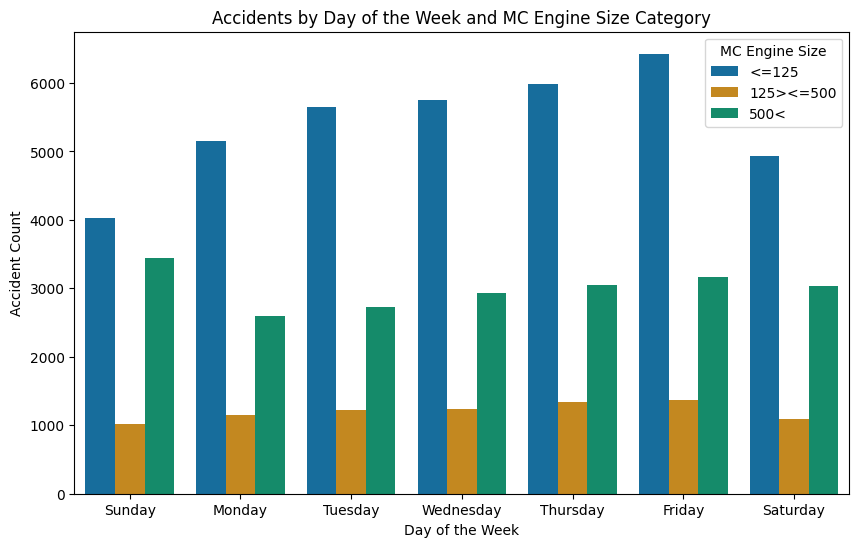

In [33]:
# Set the figure size
plt.figure(figsize=(10, 6))

day_names = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday',
             5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size


# Adjust the x-axis ticks and labels
x_ticks = np.arange(daily_accident.index.min(), daily_accident.index.max() + 1)
x_labels = [day_names[day] for day in x_ticks]

# Create a count plot for accidents based on engine size category, day of the week,
sns.countplot(data=mc_df, x='day_of_week', hue='engine_size_category', palette='colorblind')
plt.xticks(x_ticks-1, x_labels)
# Set the title and labels
plt.title('Accidents by Day of the Week and MC Engine Size Category')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')

# Display the plot
plt.legend(title='MC Engine Size')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


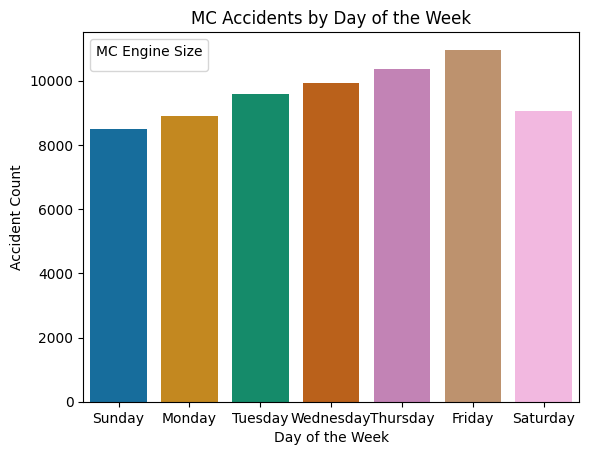

In [34]:
sns.countplot(data=mc_df, x='day_of_week', palette='colorblind')
plt.xticks(x_ticks-1, x_labels)
# Set the title and labels
plt.title('MC Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')

# Display the plot
plt.legend(title='MC Engine Size')
plt.show()

In [35]:
#removing the minutes from the time column
mc_df.loc[:, 'time'] = pd.to_datetime(mc_df['time']).dt.hour
display(mc_df['time'].max())

C:\Users\652951\AppData\Local\Temp\ipykernel_8080\2606124925.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  mc_df.loc[:, 'time'] = pd.to_datetime(mc_df['time']).dt.hour


23

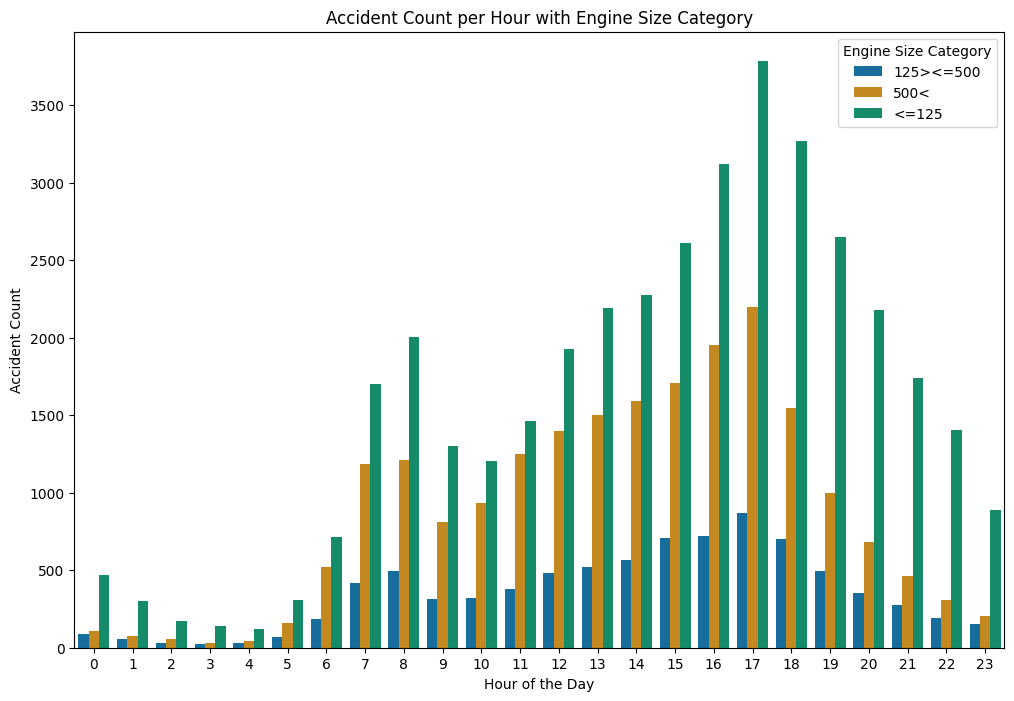

In [36]:
# Group the data by hour and engine size category, and calculate the count of accidents
hourly_accidents = mc_df.groupby(['time', 'engine_size_category']).size().reset_index(name='accident_count')

# Fill missing hours with 0 counts for each engine size category
for hour in range(24):
    for engine_size_category in mc_df['engine_size_category'].unique():
        if not ((hourly_accidents['time'] == hour) & (hourly_accidents['engine_size_category'] == engine_size_category)).any():
            hourly_accidents = hourly_accidents.append({'time': hour, 'engine_size_category': engine_size_category, 'accident_count': 0}, ignore_index=True)

# Sort the DataFrame by time
hourly_accidents = hourly_accidents.sort_values(by='time')

# Create a bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(data=hourly_accidents, x='time', y='accident_count', hue='engine_size_category', palette='colorblind')

# Set the title and labels
plt.title('Accident Count per Hour with Engine Size Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')

# Display the plot
plt.legend(title='Engine Size Category')
plt.xticks(range(24))  # Set x-axis ticks to represent 24 hours
plt.show()



In [37]:
# 3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, 
#on which they are moretime_features = [ 'day_of_week', 'time']
#create new dataframe
query_ped = f"""
SELECT 
    c.casualty_severity,
    c.casualty_class,  
    a.day_of_week, 
    a.time
FROM casualty c
JOIN accident a ON c.accident_index = a.accident_index

"""
ped_df = pd.read_sql_query(query_ped, con)
display(ped_df)

,casualty_severity,casualty_class,day_of_week,time
0,3,2,7,03:12
1,2,1,7,03:12
2,1,2,7,03:12
3,3,2,1,01:30
4,3,1,1,00:30
...,...,...,...,...
600327,2,1,4,14:30
600328,3,3,6,15:05
600329,2,1,4,12:42
600330,3,1,3,14:00


In [38]:
ped_df.loc[:, 'time'] = pd.to_datetime(ped_df['time']).dt.hour

C:\Users\652951\AppData\Local\Temp\ipykernel_8080\2257923411.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ped_df.loc[:, 'time'] = pd.to_datetime(ped_df['time']).dt.hour


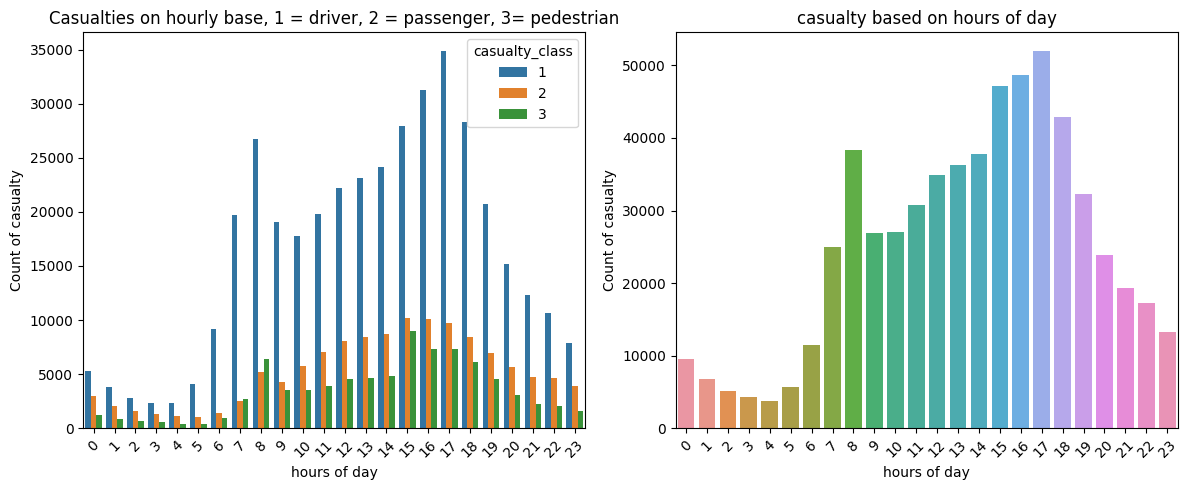

In [39]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1 - Daily pedestrian casualty and injuries types
sns.countplot(x='time', hue='casualty_class', data=ped_df, ax=axes[0])
axes[0].set_title('Casualties on hourly base, 1 = driver, 2 = passenger, 3= pedestrian' )

# Plot 2 - Pedestrian casualty based on week days
sns.countplot(x='time', data=ped_df, ax=axes[1])
axes[1].set_title('casualty based on hours of day')

# Set common labels and formatting
for ax in axes:
    ax.set_xlabel('hours of day')
    ax.set_ylabel('Count of casualty')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

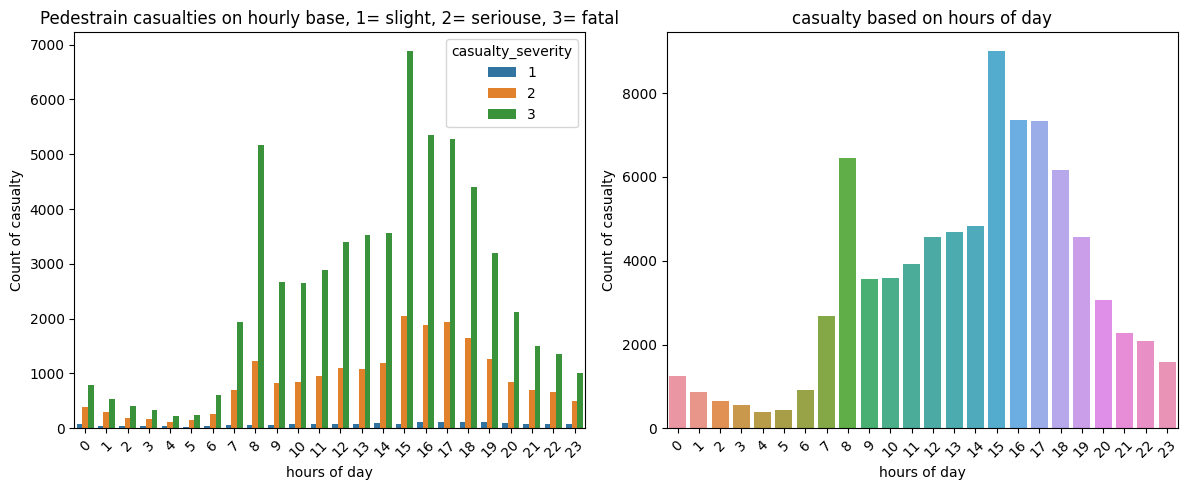

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ped1_df = ped_df[ped_df['casualty_class'] == 3]
# Plot 1 - Daily pedestrian casualty and injuries types
sns.countplot(x='time', hue = 'casualty_severity', data=ped1_df, ax=axes[0])
axes[0].set_title('Pedestrain casualties on hourly base, 1= slight, 2= seriouse, 3= fatal' )

# Plot 2 - Pedestrian casualty based on week days
sns.countplot(x='time', data=ped1_df, ax=axes[1])
axes[1].set_title('casualty based on hours of day')

# Set common labels and formatting
for ax in axes:
    ax.set_xlabel('hours of day')
    ax.set_ylabel('Count of casualty')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

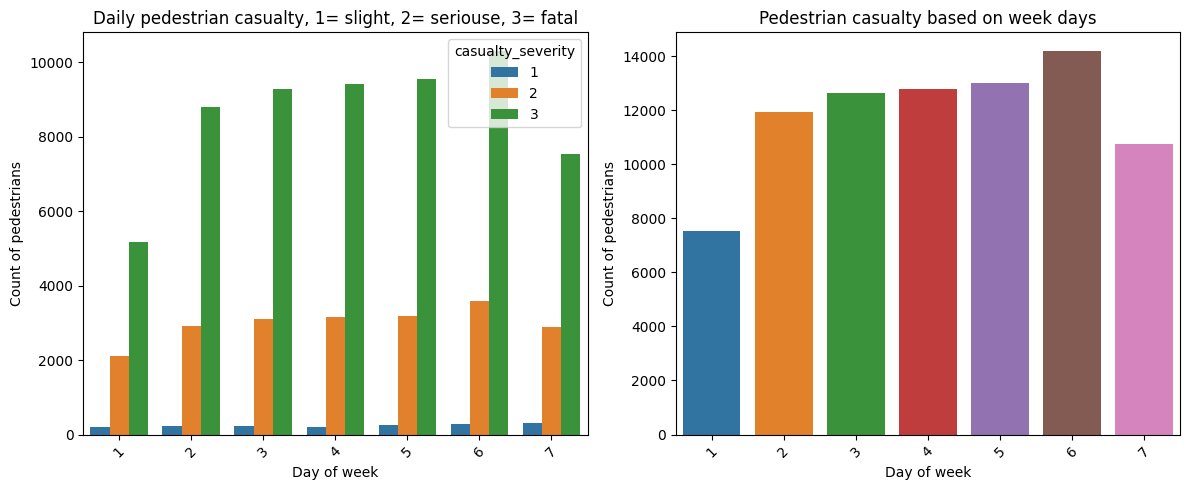

In [41]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1 - Daily pedestrian casualty and injuries types
sns.countplot(x='day_of_week', hue='casualty_severity', data=ped1_df, ax=axes[0])
axes[0].set_title('Daily pedestrian casualty, 1= slight, 2= seriouse, 3= fatal')

# Plot 2 - Pedestrian casualty based on week days
sns.countplot(x='day_of_week', data=ped1_df, ax=axes[1])
axes[1].set_title('Pedestrian casualty based on week days')

# Set common labels and formatting
for ax in axes:
    ax.set_xlabel('Day of week')
    ax.set_ylabel('Count of pedestrians')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [42]:
feature_abr = [
    'accident_severity', 
    'day_of_week', 
    'time', 
    'road_type', 
    'speed_limit',  
    'second_road_class', 
    'light_conditions', 
    'weather_conditions', 
    'road_surface_conditions',  
    'urban_or_rural_area' 
    
]


In [43]:
sample_size = int(len(accident_df) * 0.2)
accident_sample = accident_df.sample(n=sample_size, random_state=42)
accident1 = accident_sample[feature_abr]
accident1['time'] = pd.to_datetime(accident1['time']).dt.hour
# One-hot encode the categorical variables with drop_first=True
accident = pd.get_dummies(accident1, drop_first=True)

# Print the encoded DataFrame
display(accident)

C:\Users\652951\AppData\Local\Temp\ipykernel_8080\916185094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident1['time'] = pd.to_datetime(accident1['time']).dt.hour


,accident_severity,day_of_week,time,road_type,speed_limit,second_road_class,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area
6479,3,2,22,6,30,3,4,1,1,1
56503,3,5,7,6,30,3,1,1,1,2
84273,2,3,8,6,30,6,1,1,1,1
55277,2,3,12,6,30,6,1,1,1,1
48980,3,2,17,6,30,6,4,5,2,1
...,...,...,...,...,...,...,...,...,...,...
81939,3,1,12,6,40,3,1,1,1,1
1945,3,2,7,9,30,0,1,1,1,1
59570,3,6,12,6,30,0,1,1,1,1
61134,3,2,17,6,30,6,1,1,1,1


In [44]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18237 entries, 6479 to 72397
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   accident_severity        18237 non-null  int64
 1   day_of_week              18237 non-null  int64
 2   time                     18237 non-null  int64
 3   road_type                18237 non-null  int64
 4   speed_limit              18237 non-null  int64
 5   second_road_class        18237 non-null  int64
 6   light_conditions         18237 non-null  int64
 7   weather_conditions       18237 non-null  int64
 8   road_surface_conditions  18237 non-null  int64
 9   urban_or_rural_area      18237 non-null  int64
dtypes: int64(10)
memory usage: 1.5 MB


In [45]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
#4. Using the apriori algorithm, explore the impact of selected variables on accident severity.
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [47]:
from mlxtend.preprocessing import TransactionEncoder

# Convert the DataFrame to a list of transactions
transactions = []
for i, row in accident.iterrows():
    transaction = []
    for col, val in row.items():  # Use row.items() instead of row.iteritems()
        if not pd.isna(val):  # Check for missing values
            transaction.append(f"{col}={val}")
    transactions.append(transaction)

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [48]:
df_encoded.head()

,accident_severity=1,accident_severity=2,accident_severity=3,day_of_week=1,day_of_week=2,day_of_week=3,day_of_week=4,day_of_week=5,day_of_week=6,day_of_week=7,...,urban_or_rural_area=2,weather_conditions=1,weather_conditions=2,weather_conditions=3,weather_conditions=4,weather_conditions=5,weather_conditions=6,weather_conditions=7,weather_conditions=8,weather_conditions=9
0,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [49]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filter association rules related to 'accident_severity'
severity_rules = rules[rules['consequents'].apply(lambda x: 'accident_severity'==3 in str(x))]

# Sort the filtered rules by confidence (descending)
top_ten_rules = severity_rules.sort_values(by='confidence', ascending=False).head(10)


In [50]:
# Print the top ten rules
display(top_ten_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14558,"(road_surface_conditions=1, road_type=9, light...",(accident_severity=3),0.010693,0.780995,0.010199,0.953846,1.221322,0.001848,4.745115,0.183174
17873,"(road_surface_conditions=1, road_type=9, weath...",(accident_severity=3),0.010857,0.780995,0.010254,0.944444,1.209284,0.001775,3.942096,0.174964
17862,"(road_surface_conditions=1, road_type=9, urban...",(accident_severity=3),0.012338,0.780995,0.011625,0.942222,1.206439,0.001989,3.790477,0.173252
15315,"(road_type=9, urban_or_rural_area=1, light_con...",(accident_severity=3),0.014860,0.780995,0.013983,0.940959,1.204822,0.002377,3.709403,0.172566
20854,"(weather_conditions=1, road_type=9, urban_or_r...",(accident_severity=3),0.011405,0.780995,0.010693,0.937500,1.200392,0.001785,3.504085,0.168865
1712,"(road_type=9, light_conditions=1)",(accident_severity=3),0.015957,0.780995,0.014915,0.934708,1.196817,0.002453,3.354239,0.167117
1967,"(road_surface_conditions=1, road_type=9)",(accident_severity=3),0.013215,0.780995,0.012338,0.933610,1.195411,0.002017,3.298768,0.165657
2344,"(road_type=9, weather_conditions=1)",(accident_severity=3),0.012392,0.780995,0.011460,0.924779,1.184104,0.001782,2.911482,0.157430
2340,"(road_type=9, urban_or_rural_area=1)",(accident_severity=3),0.019959,0.780995,0.018369,0.920330,1.178407,0.002781,2.748894,0.154480
67,(road_type=9),(accident_severity=3),0.021221,0.780995,0.019356,0.912145,1.167927,0.002783,2.492796,0.146899


In [163]:
for i, rule in top_ten_rules.iterrows():
    print(f"Antecedent: {rule['antecedents']}")

Antecedent: frozenset({'road_surface_conditions=1', 'road_type=9', 'light_conditions=1'})
Antecedent: frozenset({'road_surface_conditions=1', 'road_type=9', 'weather_conditions=1'})
Antecedent: frozenset({'road_surface_conditions=1', 'road_type=9', 'urban_or_rural_area=1'})
Antecedent: frozenset({'road_type=9', 'urban_or_rural_area=1', 'light_conditions=1'})
Antecedent: frozenset({'weather_conditions=1', 'road_type=9', 'urban_or_rural_area=1'})
Antecedent: frozenset({'road_type=9', 'light_conditions=1'})
Antecedent: frozenset({'road_surface_conditions=1', 'road_type=9'})
Antecedent: frozenset({'road_type=9', 'weather_conditions=1'})
Antecedent: frozenset({'road_type=9', 'urban_or_rural_area=1'})
Antecedent: frozenset({'road_type=9'})


In [51]:
#5. Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc.
#You can do this by filtering on LSOA, or police region or another method if you can find one.
#Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 
# Filter rows containing substrings 'Hull', 'Humberside', or 'East Riding' in the 'lsoa01nm' column
h_2_e_data = loca_df[loca_df['lsoa01nm'].str.contains('Hull|Humberside|East Riding')]

# Print the filtered rows
display(h_2_e_data.head())
print (len(h_2_e_data))



,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
12755,12756,E01012756,Kingston upon Hull 025A,Kingston upon Hull 025A,198940.919128,3498.355895,6f44ac4a-9449-4c64-8564-6f612bf9a060
12756,12757,E01012757,Kingston upon Hull 025B,Kingston upon Hull 025B,318087.393494,3716.587517,e1c0a075-7ca8-425e-8437-39db56a6b994
12757,12758,E01012758,Kingston upon Hull 018A,Kingston upon Hull 018A,311920.258041,3775.303823,a049347f-f7fb-481f-90ca-a95e632ac97a
12758,12759,E01012759,Kingston upon Hull 025C,Kingston upon Hull 025C,398188.211227,3984.807880,f55da506-35c7-4db5-a007-bba4255d50e3
12759,12760,E01012760,Kingston upon Hull 025D,Kingston upon Hull 025D,125999.228485,2082.915305,dc1e40d1-79fe-4cda-b204-d22f9362b043


372


In [99]:
location_ids = h_2_e_data['lsoa01cd']

# Filter accident DataFrame based on location IDs
accident_cdf = accident_df[accident_df['lsoa_of_accident_location'].isin(location_ids)]
accident_cdf =  accident_cdf[ accident_cdf['latitude'] < 54.966667 ]
# Print the filtered DataFrame length
display(len(accident_cdf))
display(accident_cdf)

1057

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
37751,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,5,1,1,1,0,0,1,1,2,E01012777
37753,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,0,4,1,1,0,0,1,1,2,E01012788
37755,2020160915047,2020,160915047,510322.0,431457.0,-0.327733,53.767805,16,3,1,...,0,4,1,1,0,3,1,1,2,E01012817
37757,2020160915332,2020,160915332,511596.0,429551.0,-0.309102,53.750410,16,3,1,...,0,1,1,1,0,0,1,1,2,E01012810
37758,2020160915337,2020,160915337,509786.0,432528.0,-0.335481,53.777540,16,3,2,...,0,4,1,1,0,0,1,1,2,E01012817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39452,2020161013646,2020,161013646,502981.0,432285.0,-0.438783,53.776745,16,3,2,...,0,4,1,1,0,0,1,2,2,E01012954
39453,2020161013730,2020,161013730,509222.0,432955.0,-0.343885,53.781494,16,3,2,...,4,1,1,1,0,0,1,2,2,E01012912
39455,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,...,0,4,1,1,0,0,1,2,2,E01013041
39456,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,0,1,1,1,0,0,1,2,2,E01012907


In [100]:
filtered_accident = accident_cdf[['longitude','latitude']]


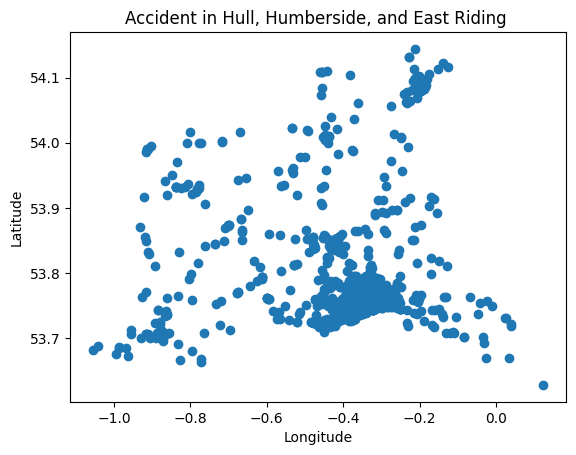

In [101]:
plt.scatter( accident_cdf['longitude'],  accident_cdf['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident in Hull, Humberside, and East Riding ')
plt.show()

In [104]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(filtered_accident)

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.1, min_samples=20)  # Adjust parameters as needed

# Fit the model to the normalized data
cluster_labels = dbscan.fit_predict(data_normalized)

# Add cluster labels to the DataFrame
filtered_accident['cluster'] = cluster_labels

# Print the DataFrame with cluster labels
print(filtered_accident)


       longitude   latitude  cluster
37751  -0.393424  53.744936        0
37753  -0.324858  53.791630        0
37755  -0.327733  53.767805        0
37757  -0.309102  53.750410        0
37758  -0.335481  53.777540        0
...          ...        ...      ...
39452  -0.438783  53.776745       -1
39453  -0.343885  53.781494        0
39455  -0.424674  53.839482        2
39456  -0.308880  53.782750        0
39458  -0.342063  53.742609        0

[1057 rows x 3 columns]


C:\Users\652951\AppData\Local\Temp\ipykernel_8080\3266554417.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accident['cluster'] = cluster_labels


In [105]:
print(filtered_accident['cluster'].unique())

[ 0 -1  3  1  2]


In [106]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(data_normalized)

# Add cluster labels to the DataFrame
filtered_accident['cluster'] = cluster_labels

# Print the DataFrame with cluster labels
display(filtered_accident)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\652951\AppData\Local\Temp\ipykernel_8080\2703387884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accident['cluster'] = cluster_labels


,longitude,latitude,cluster
37751,-0.393424,53.744936,0
37753,-0.324858,53.791630,0
37755,-0.327733,53.767805,0
37757,-0.309102,53.750410,0
37758,-0.335481,53.777540,0
...,...,...,...
39452,-0.438783,53.776745,0
39453,-0.343885,53.781494,0
39455,-0.424674,53.839482,0
39456,-0.308880,53.782750,0


In [108]:
display(filtered_accident['cluster'].unique())

array([0, 1, 3, 2, 4])

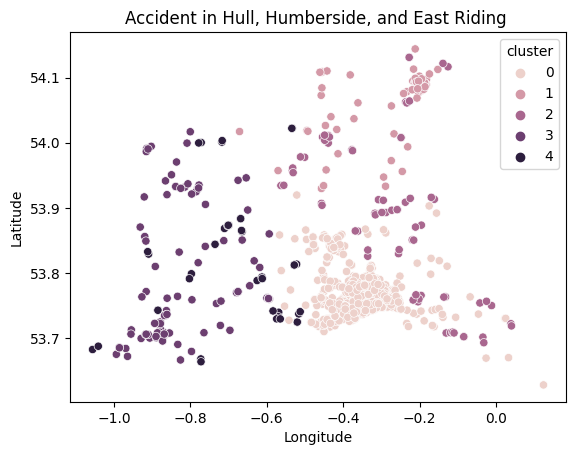

In [124]:
sns.scatterplot( data = filtered_accident, x='longitude', y ='latitude', hue = 'cluster' )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident in Hull, Humberside, and East Riding ')
plt.show()

In [57]:
!pip install geopandas folium

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/100.0 kB ? eta -:--:--
     -------------------------------------- 100.0/100.0 kB 2.9 MB/s eta 0:00:00
                                              0.0/82.0 kB ? eta -:--:--
     ---------------------------------------- 82.0/82.0 kB 4.5 MB/s eta 0:00:00


In [58]:
import geopandas as gpd
import folium

In [130]:
gdf = gpd.GeoDataFrame(filtered_accident, geometry=gpd.points_from_xy(filtered_accident.longitude, filtered_accident.latitude))

# Initialize the map
m = folium.Map(location=[filtered_accident.latitude.mean(), filtered_accident.longitude.mean()], zoom_start=10)
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4 : 'black'}
# Add clusters as markers to the map
for idx, row in gdf.iterrows():
    cluster_id = row['cluster']
    color = cluster_colors.get(cluster_id, 'gray')
    folium.CircleMarker(location=[row['latitude'], row['longitude']], 
                    radius=3,
                    color=color,fill=True, fill_color=color).add_to(m)
# Save the map to an HTML file
m.save('clustered_accidents_map.html')

# Display the map
m

In [60]:
# 6. Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?
# Assuming accident_df is your DataFrame with the accident data
# Select numerical columns for outlier detection
numerical_columns = [ 'accident_severity', 'number_of_vehicles',
                     'number_of_casualties', 'day_of_week', 'first_road_class', 'speed_limit', 
                     'second_road_class', 'light_conditions', 
                     'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area'] 
accident_out = accident_df[numerical_columns]
accident_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   accident_severity        91185 non-null  int64
 1   number_of_vehicles       91185 non-null  int64
 2   number_of_casualties     91185 non-null  int64
 3   day_of_week              91185 non-null  int64
 4   first_road_class         91185 non-null  int64
 5   speed_limit              91185 non-null  int64
 6   second_road_class        91185 non-null  int64
 7   light_conditions         91185 non-null  int64
 8   weather_conditions       91185 non-null  int64
 9   road_surface_conditions  91185 non-null  int64
 10  urban_or_rural_area      91185 non-null  int64
dtypes: int64(11)
memory usage: 10.4 MB


In [131]:
from scipy.stats import zscore
out_data =  accident_out.head(20000)
# Calculate z-scores for numerical columns
accident_df_zscore = out_data.apply(zscore)

# Define threshold for identifying outliers
zscore_threshold = 3

# Identify outliers based on z-scores
outliers = (accident_df_zscore > zscore_threshold).any(axis=1)

# Print the outliers
print("Outliers:")
display(out_data[outliers])

Outliers:


,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,speed_limit,second_road_class,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area
0,3,1,1,3,6,20,0,1,9,9,1
11,2,3,4,4,3,40,5,4,1,2,1
15,1,1,1,4,3,50,0,4,7,2,2
33,3,2,1,4,6,20,6,4,9,9,1
42,3,1,1,5,6,30,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
19945,3,2,1,7,3,30,0,7,9,9,1
19965,3,2,4,3,3,30,6,1,1,2,1
19966,3,1,3,3,4,20,5,1,1,1,1
19989,3,2,4,3,5,30,6,7,1,1,1


In [62]:
#7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained 
#in road traffic accidents, with the aim of informing and improving road safety measures?
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [63]:

# Split the dataset into features (X) and the target variable (y)
X = accident_dataset.drop('accident_severity', axis=1)  # Features
y = accident_dataset['accident_severity']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
print( y.unique())


[3 2 1]


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the classifier on the test data
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7765531611558919


In [139]:
from sklearn.metrics import confusion_matrix

# Predict the labels of the test data
y_pred = rf_classifier.predict(X_test)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(conf_mat)

[[    0    21   259]
 [    1   176  3537]
 [    1   256 13986]]


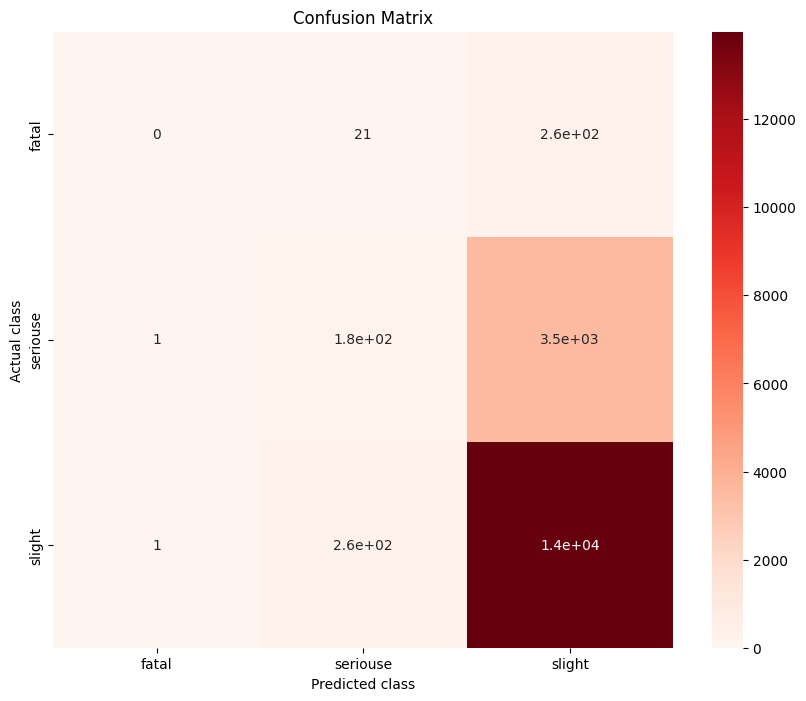

In [152]:

class_names =  y.unique()

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Reds', xticklabels=['fatal', 'seriouse','slight'], yticklabels=['fatal', 'seriouse','slight'])
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion Matrix')
plt.show()

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7765531611558919
Precision: 0.6933954287766497
Recall: 0.7765531611558919
F1 Score: 0.6993571804572474


In [137]:
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [133]:
def get_models():
    models= dict()
    models['dtree'] =DecisionTreeClassifier()
    models['rfc'] = RandomForestClassifier()
    models['bayes'] = GaussianNB()
    return models

In [134]:
def evaluate_model(model, x,y):
    cv= RepeatedStratifiedKFold(
        
        n_repeats= 3,
        random_state = 1)
    scores = cross_val_score(
    model, x,y,
    scoring= "accuracy",
    cv= cv, error_score = "raise"
    )
    return scores

In [135]:
models = get_models()

In [138]:
names=[]
results = []
for name, model in models.items():
     scores = evaluate_model(model, X_train, y_train)
     print(f'{name}: {mean(scores):3.3f} {std(scores):4.3f}')

dtree: 0.668 0.004
rfc: 0.779 0.001
bayes: 0.419 0.009
